In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [282]:
df = pd.read_csv('Data/Lyon/listings.csv')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,831713,https://www.airbnb.com/rooms/831713,20240913025629,2024-09-13,city scrape,645 sq ft (60m²) apartment downtown lyon 2BR...,Apartment located in Saint-Just up the hill of...,NaN,https://a0.muscache.com/pictures/12333829/0f9e...,4355017,...,4.89,4.75,4.72,6938513291736,f,1,1,0,0,0.38
1,845068,https://www.airbnb.com/rooms/845068,20240913025629,2024-09-13,previous scrape,APARTMENT INCOMPARABLE PLACE OF THE LYON,n the heart of the Lyonnaise peninsula in the ...,Everything is very exciting in this lively dis...,https://a0.muscache.com/pictures/miso/Hosting-...,3548058,...,4.63,4.88,4.63,6938212387343,f,1,1,0,0,0.06
2,877193,https://www.airbnb.com/rooms/877193,20240913025629,2024-09-13,previous scrape,Loft heart of Lyon ideal for family,NaN,"The area is lively, many shops: bakeries, butc...",https://a0.muscache.com/pictures/7c52fdbb-3959...,4634428,...,4.94,4.85,4.77,6938312653768,f,1,1,0,0,1.30
3,903331,https://www.airbnb.com/rooms/903331,20240913025629,2024-09-13,city scrape,GD STAND - BUSINESS OR HOLIDAYS- 4*,"Rated 4 stars- for business or for holidays, i...",The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.79,4.62,4.47,6938613145318,f,2,2,0,0,0.27
4,903333,https://www.airbnb.com/rooms/903333,20240913025629,2024-09-13,city scrape,LYON BROTTEAUX- MEUBLE LONGUE DUREE,Very bright apartment and ideally located in t...,The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.80,4.60,4.80,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,1242732963585164960,https://www.airbnb.com/rooms/1242732963585164960,20240913025629,2024-09-13,city scrape,1 chambre et ses sanitaires,"Make life easier at this peaceful, centrally l...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,101091223,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9734,1242761246611533328,https://www.airbnb.com/rooms/1242761246611533328,20240913025629,2024-09-13,city scrape,Joli T2 35M2 Climatisé Charpennes Prox Métro/Gare,Forget your worries in this spacious and seren...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,481631923,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9735,1242852624542775283,https://www.airbnb.com/rooms/1242852624542775283,20240913025629,2024-09-13,city scrape,Pasteur 2 Quai Du Rhône,Located on the banks of the Rhone and in the G...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,168526277,...,NaN,NaN,NaN,Exempt - hotel-type listing,t,35,35,0,0,NaN
9736,1243312517385503700,https://www.airbnb.com/rooms/1243312517385503700,20240913025629,2024-09-13,city scrape,Studio Pallier St Jean Vieux Lyon,Charming studio located in the heart of the hi...,Restaurants & Cafes: <br /> <br />- Le Tire-Bo...,https://a0.muscache.com/pictures/prohost-api/H...,226216922,...,NaN,NaN,NaN,6938524452674,t,97,97,0,0,NaN


In [283]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1817
Length: 75, dtype: int64

In [284]:
# df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)

In [285]:
le = LabelEncoder()
catcol = df.select_dtypes(include=['object','bool'])

for x in catcol:
    df[x] = le.fit_transform(df[x])

df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,831713,8474,20240913025629,0,0,171,872,4907,413,4355017,...,4.89,4.75,4.72,2993,0,1,1,0,0,0.38
1,845068,8532,20240913025629,0,1,230,9114,762,8431,3548058,...,4.63,4.88,4.63,969,0,1,1,0,0,0.06
2,877193,8732,20240913025629,0,1,6275,9256,3516,2773,4634428,...,4.94,4.85,4.77,1607,0,1,1,0,0,1.30
3,903331,8915,20240913025629,0,0,4926,6185,3591,5862,4829230,...,4.79,4.62,4.47,3378,0,2,2,0,0,0.27
4,903333,8916,20240913025629,0,0,5717,8031,3591,6272,4829230,...,4.80,4.60,4.80,4940,0,2,2,0,0,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,1242732963585164960,1806,20240913025629,0,0,47,5075,4907,5741,101091223,...,NaN,NaN,NaN,4955,0,1,0,1,0,NaN
9734,1242761246611533328,1807,20240913025629,0,0,5442,3223,4907,5742,481631923,...,NaN,NaN,NaN,4955,0,1,1,0,0,NaN
9735,1242852624542775283,1808,20240913025629,0,0,7278,4944,4907,5743,168526277,...,NaN,NaN,NaN,4951,1,35,35,0,0,NaN
9736,1243312517385503700,1810,20240913025629,0,0,7870,2068,2580,9179,226216922,...,NaN,NaN,NaN,3149,1,97,97,0,0,NaN


In [286]:
df['beds_and_baths'] = df['bedrooms'] + df['bathrooms']
corr = df.corr()
print(corr['price'])

id                                             -0.218020
listing_url                                    -0.005664
scrape_id                                            NaN
last_scraped                                         NaN
source                                          0.593789
                                                  ...   
calculated_host_listings_count_entire_homes    -0.048064
calculated_host_listings_count_private_rooms   -0.004469
calculated_host_listings_count_shared_rooms    -0.010564
reviews_per_month                              -0.153954
beds_and_baths                                 -0.245273
Name: price, Length: 76, dtype: float64


In [287]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [288]:
df.drop(columns=['bedrooms','bathrooms','beds', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'description', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],axis=1,inplace=True)

<Axes: >

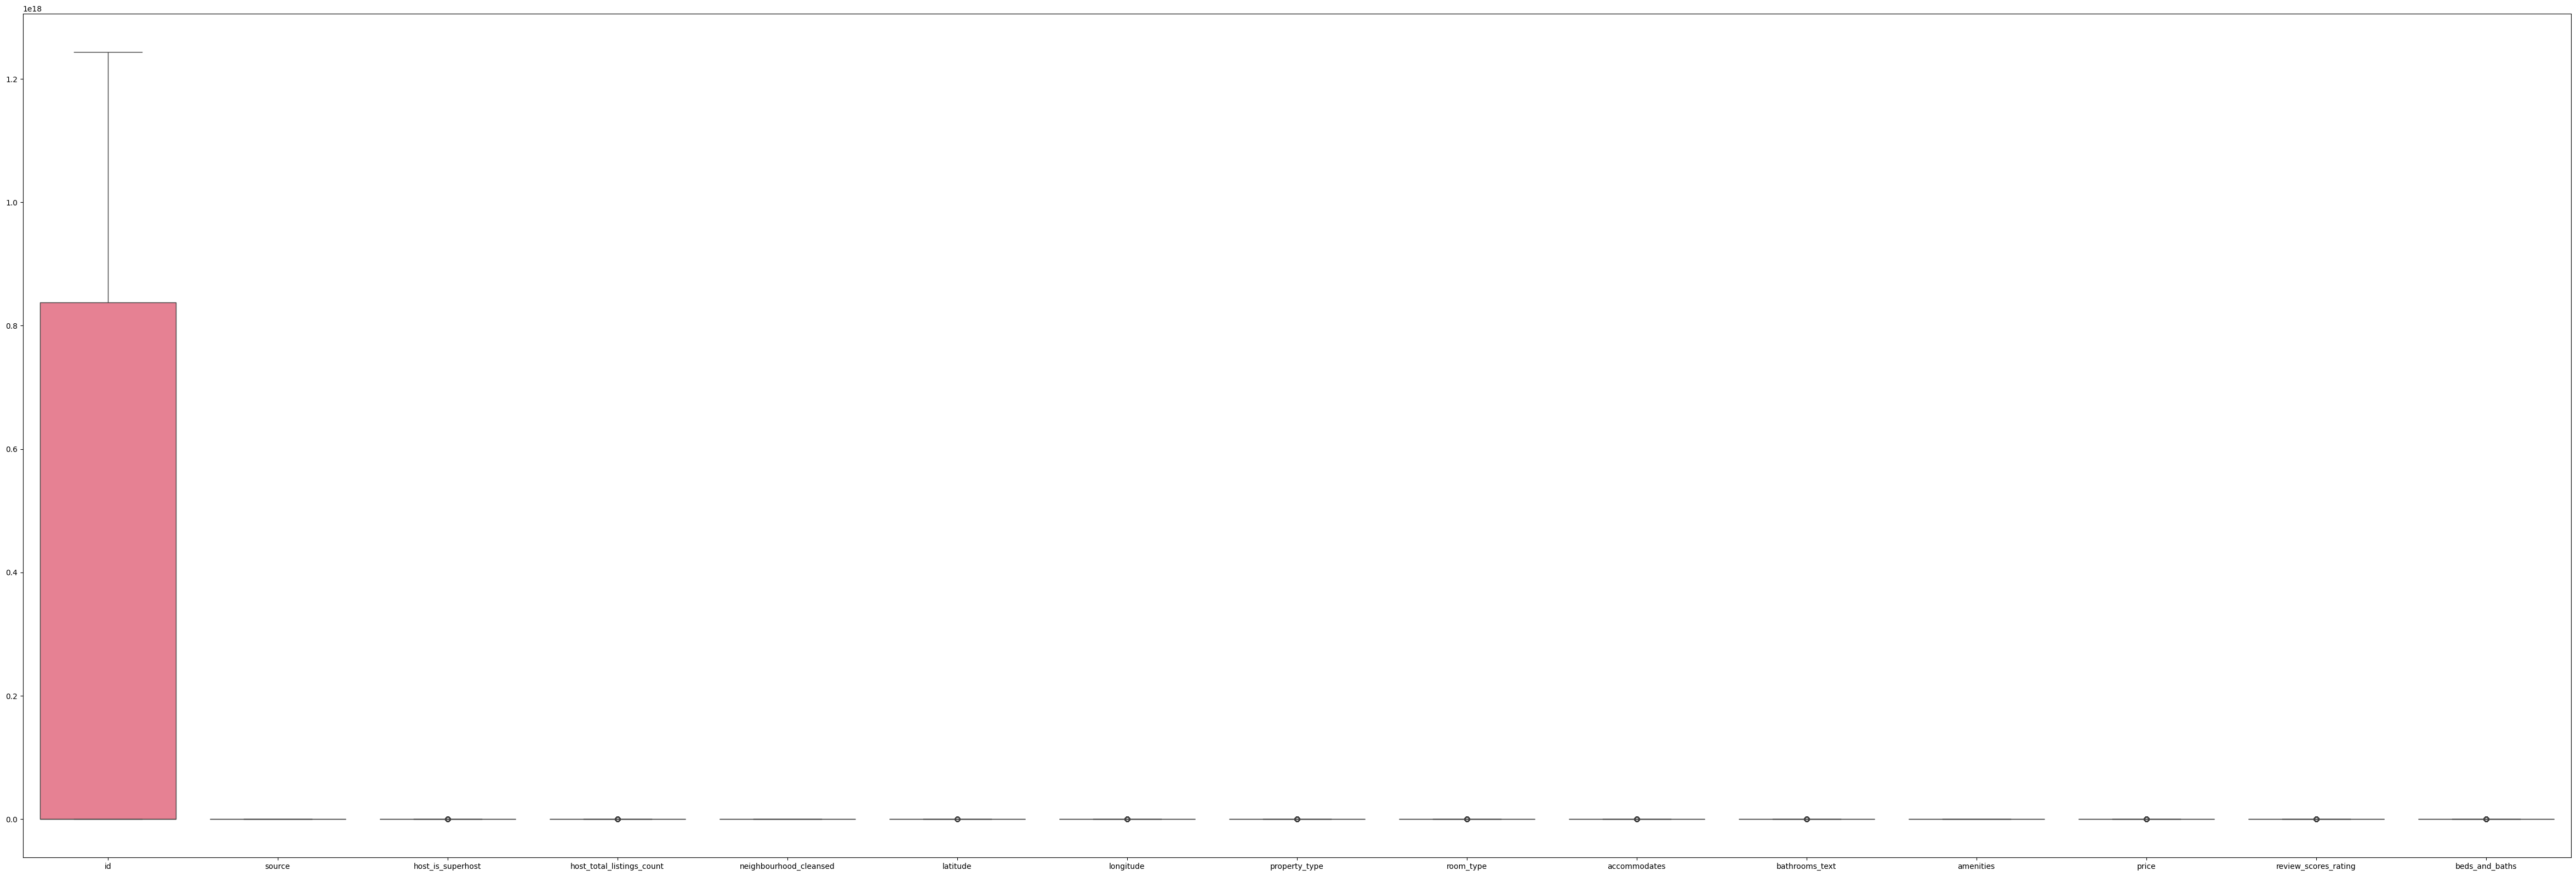

In [289]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [290]:
pt = PowerTransformer(method='yeo-johnson')
df.skew()

id                            0.671191
source                        0.180258
host_is_superhost             1.865519
host_total_listings_count    13.141837
neighbourhood_cleansed        0.186982
latitude                     -0.177368
longitude                     0.102516
property_type                 1.488623
room_type                     1.441006
accommodates                  1.955115
bathrooms_text                4.218764
amenities                    -0.061360
price                        -1.503768
review_scores_rating         -3.840776
beds_and_baths                3.977130
dtype: float64

In [291]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

cols = (df.drop(columns=['price'], axis=1)).columns
pt = PowerTransformer(method='yeo-johnson')

for x in cols:
    try:
        if df[x].abs().max() > 1e6:
            print(f"Applying log transformation to column {x} due to large values.")
            df[x] = np.log1p(df[x].abs())

        df[x] = pt.fit_transform(df[[x]])
    except Exception as e:
        print(f"Error transforming column {x}: {e}")

print(df.skew())


Applying log transformation to column id due to large values.
Error transforming column latitude: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
id                           0.380864
source                       0.180258
host_is_superhost            1.485578
host_total_listings_count    0.745695
neighbourhood_cleansed      -0.155631
latitude                    -0.177368
longitude                   -0.002743
property_type               -0.099346
room_type                    1.396415
accommodates                 0.030372
bathrooms_text              -0.779565
amenities                   -0.311201
price                       -1.503768
review_scores_rating        -0.391894
beds_and_baths              -0.096670
dtype: float64


c:\wamp64\www\IPSSI\MIA 2\Statistiques\Tp_Groupe\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:3438: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


<Axes: >

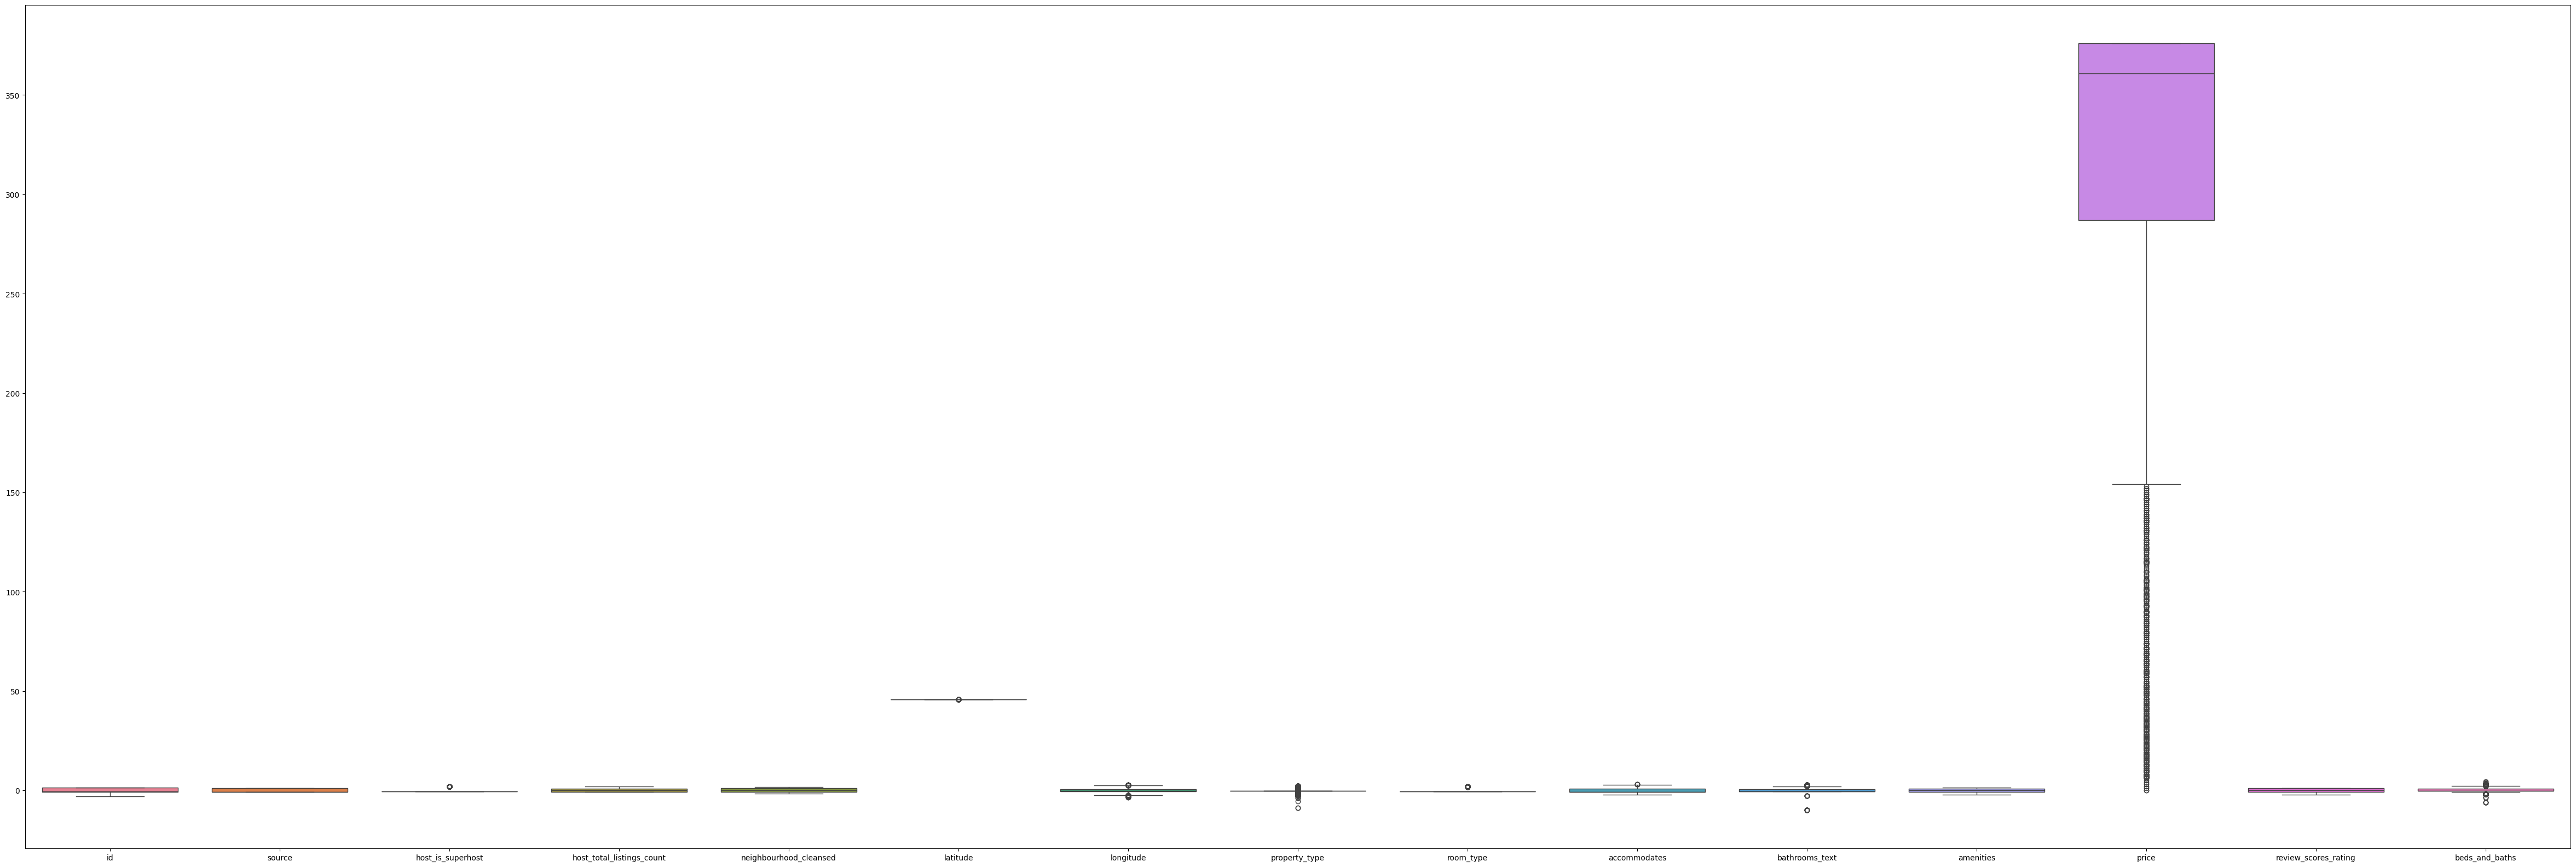

In [292]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [293]:
df.isnull().sum()

id                              0
source                          0
host_is_superhost               0
host_total_listings_count       2
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  0
amenities                       0
price                           0
review_scores_rating         1817
beds_and_baths               4448
dtype: int64

In [294]:
df.dropna(subset=['beds_and_baths'],inplace=True)
df['beds_and_baths'].isnull().sum()

0

In [295]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())))
df.isnull().sum()

id                           0
source                       0
host_is_superhost            0
host_total_listings_count    0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text               0
amenities                    0
price                        0
review_scores_rating         0
beds_and_baths               0
dtype: int64

In [296]:
df.drop(columns=['latitude','longitude','id'],axis=1,inplace=True)
df

,source,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,amenities,price,review_scores_rating,beds_and_baths
0,-0.913937,-0.502948,0.049822,0.334693,-0.306331,-0.521477,0.734631,-0.502044,-0.502053,340,-0.214905,0.784855
3,-0.913937,-0.502948,0.983259,0.673490,-0.087892,-0.521477,1.494793,2.091019,-1.807997,90,-1.009634,1.460380
4,-0.913937,-0.502948,0.983259,0.673490,-0.306331,-0.521477,1.494793,2.091019,-0.731808,356,1.162038,1.460380
5,-0.913937,1.986382,0.513045,0.986250,-0.306331,-0.521477,1.494793,-0.502044,-1.521789,59,-0.123462,1.460380
6,-0.913937,-0.502948,1.731955,0.986250,-0.306331,-0.521477,0.734631,-0.502044,-0.834958,319,-1.334328,-0.224270
...,...,...,...,...,...,...,...,...,...,...,...,...
9733,-0.913937,-0.502948,0.513045,-0.459245,1.681481,1.917657,-0.716559,-0.502044,0.407344,257,0.000000,-0.224270
9734,-0.913937,2.011640,1.464454,0.673490,-0.306331,-0.521477,0.734631,-0.502044,0.093335,323,0.000000,-0.224270
9735,-0.913937,-0.502948,1.926871,0.986250,-0.306331,-0.521477,-0.716559,-0.502044,0.985395,342,0.000000,-0.224270
9736,-0.913937,-0.502948,1.960669,0.334693,-0.306331,-0.521477,-0.716559,-0.502044,-0.252582,7,0.000000,-0.224270


In [297]:
df['price_per_room'] = df['price']/df['beds_and_baths']

In [298]:
corr = df.corr()
print(corr['price'])

source                            NaN
host_is_superhost           -0.003134
host_total_listings_count    0.046615
neighbourhood_cleansed       0.068542
property_type                0.045457
room_type                    0.057354
accommodates                -0.262281
bathrooms_text              -0.074112
amenities                    0.057968
price                        1.000000
review_scores_rating        -0.095146
beds_and_baths              -0.292867
price_per_room              -0.489373
Name: price, dtype: float64


In [299]:
Features = df.drop(columns=['price'],axis=1)
Labels = df['price']

ft, fe, lt, le = train_test_split(Features,Labels, test_size=0.2, random_state=42)

In [300]:
xg = XGBRegressor()
xg.fit(ft, lt)
pred = xg.predict(fe)
print(xg.score(fe,le))

0.998288094997406


In [301]:
acc = cross_val_score(xg, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print(acc)

[0.99861109 0.99824452 0.99885821 0.99886411 0.99778438 0.99853408
 0.99844152 0.9989413  0.99823004 0.99827546]


In [302]:
r2 = r2_score(le, pred)
print(f"R²: {r2}")

mse = mean_squared_error(le, pred)
print(f"MSE: {mse}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

R²: 0.998288094997406
MSE: 27.934134365940604
RMSE: 5.285275240320092


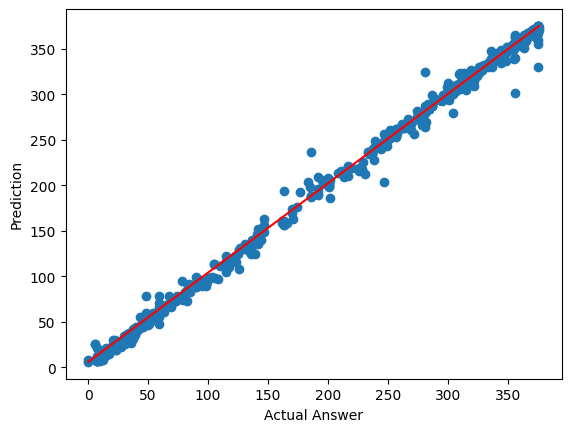

In [303]:
plt.scatter(le, pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(le),max(le)],[min(pred),max(pred)],color='red')

In [304]:
# %pip install nbconvert
# !jupyter nbconvert --to script model_xgboost.ipynb

In [ ]:
import xgboost as xgb
import onnx
import onnxruntime as ort
import numpy as np
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import update_registered_converter
from skl2onnx.common.shape_calculator import calculate_linear_regressor_output_shapes
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost

update_registered_converter(
	XGBRegressor, 'XGBoostXGBRegressor',
	calculate_linear_regressor_output_shapes, convert_xgboost)

ft.columns = [f'f{i}' for i in range(ft.shape[1])]

xg = XGBRegressor()
xg.fit(ft, lt)

xg.save_model("xgboost_model.json")

xgb_model = xgb.Booster()
xgb_model.load_model("xgboost_model.json")

initial_type = [('float_input', FloatTensorType([None, ft.shape[1]]))]
onnx_model = convert_sklearn(xg, initial_types=initial_type, target_opset={'ai.onnx.ml': 3})
with open("xgboost_model.onnx", "wb") as f:
	f.write(onnx_model.SerializeToString())

In [ ]:
# session = ort.InferenceSession("xgboost_model.onnx")

# example_input = fe.values.astype(np.float32)
# pred_onnx = session.run(None, {"float_input": example_input})[0]

# print(pred_onnx[:5])


[[335.51334]
 [313.3103 ]
 [300.23996]
 [256.43262]
 [363.16238]]
